In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import random

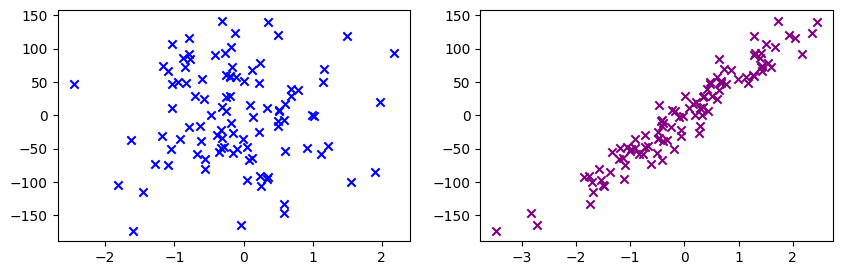

In [2]:
size = 100
X, y = make_regression(n_samples=size, n_features=2, n_targets=1, noise=20, random_state=15)
m = len(X[:,0])
X = np.concatenate((X,np.ones((m,1))),axis=1)
n = len(X[0,:])
X1 = X[:,0]
X2 = X[:,1]

fig = plt.figure(figsize=(10,3))

axes1 = fig.add_subplot(121)
axes1.scatter(X1, y, color="blue", marker="x")

axes2 = fig.add_subplot(122)
axes2.scatter(X2, y, color="purple", marker="x")

plt.show()

In [3]:
class miniBatchGDRegressor:
    def __init__(self, epochs, learning_rate, batch_size):
        
        self.epochs = epochs
        self.lr = learning_rate
        self.batch_size = batch_size
    
    def fit(self, X, y):
        self.m = X.shape[0]
        self.n = X.shape[1]
        self.b = np.ones(n)
        self.b[n-1]=0
        self.b_x = np.ones((self.epochs,n))
        self.loss = np.zeros((self.epochs,n))

        for i in range(self.epochs):
            for j in range(int(m/self.batch_size)):
                idx = random.sample(range(m),self.batch_size)
                for c in range(self.n):
                    y_hat = np.dot(X[idx], self.b)
                    db = (-2/self.m)*np.sum((y[idx] - y_hat)*X[idx,c])

                    self.b_x[[i,c]] = self.b[c]
                    self.loss[[i,c]] = (1/self.m)*np.sum((y[idx] - np.dot(X[idx], self.b))**2)

                    self.b[c] = self.b[c] - self.lr*db
        print(self.b)
        return self.b, self.b_x, self.loss

[ 5.52388258 58.19442252  0.97776437]


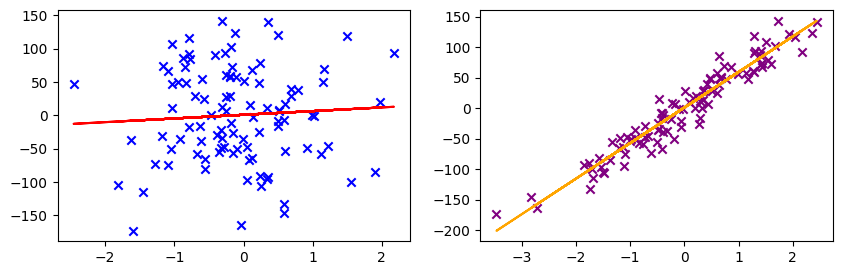

In [4]:
bGD = miniBatchGDRegressor(1000, 0.01, 10)
b, b_x, loss = bGD.fit(X, y)

fig = plt.figure(figsize=(10,3))

axes1 = fig.add_subplot(121)
axes1.scatter(X1, y, color="blue", marker="x")
axes1.plot(X1, b[0]*X[:,0]+b[n-1], color="red")

axes2 = fig.add_subplot(122)
axes2.scatter(X2, y, color="purple", marker="x")
axes2.plot(X2, b[1]*X[:,1]+b[n-1], color="orange")

plt.show()